In [3]:
#Requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import kagglehub
import os


In [5]:
path = kagglehub.dataset_download("mahdimashayekhi/mental-health")

# Show full file structure
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))


/kaggle/input/mental-health/mental_health_dataset.csv


In [6]:
df = pd.read_csv(path + '/mental_health_dataset.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10000 non-null  int64  
 1   gender                  10000 non-null  object 
 2   employment_status       10000 non-null  object 
 3   work_environment        10000 non-null  object 
 4   mental_health_history   10000 non-null  object 
 5   seeks_treatment         10000 non-null  object 
 6   stress_level            10000 non-null  int64  
 7   sleep_hours             10000 non-null  float64
 8   physical_activity_days  10000 non-null  int64  
 9   depression_score        10000 non-null  int64  
 10  anxiety_score           10000 non-null  int64  
 11  social_support_score    10000 non-null  int64  
 12  productivity_score      10000 non-null  float64
 13  mental_health_risk      10000 non-null  object 
dtypes: float64(2), int64(6), object(6)
memo

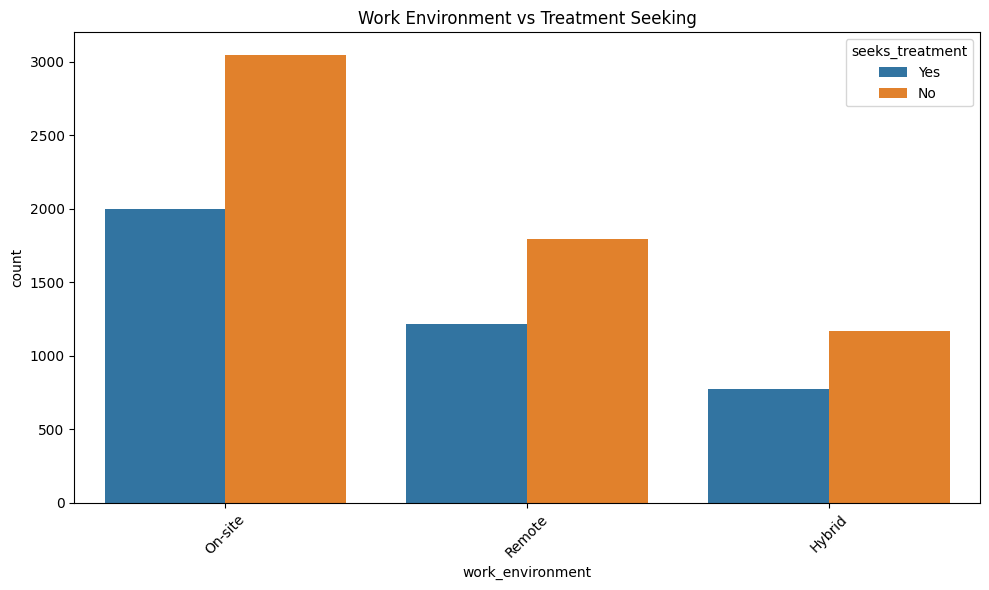

In [9]:
#Exploratory Data Analysis
print(df.info())
print(df.describe())
print(df.isnull().sum())

plt.figure(figsize=(10, 6))
sns.countplot(x='work_environment', hue='seeks_treatment', data=df)
plt.title('Work Environment vs Treatment Seeking')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
categorical_cols = ['gender', 'employment_status', 'work_environment',
                    'mental_health_history', 'seeks_treatment', 'mental_health_risk']

le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [11]:
# Features and target
X = df_encoded.drop('mental_health_risk', axis=1)
y = df_encoded['mental_health_risk']

In [12]:
#Creating train and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Using Random Forst Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [15]:
#Evaluation of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.976

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       474
           1       0.99      0.94      0.96       348
           2       0.97      0.99      0.98      1178

    accuracy                           0.98      2000
   macro avg       0.98      0.97      0.97      2000
weighted avg       0.98      0.98      0.98      2000


Confusion Matrix:
 [[ 461    0   13]
 [   0  326   22]
 [  10    3 1165]]
